In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df

,X1,X2,Y
0,90,50,1
1,80,15,1
2,88,55,0
3,78,7,1
4,3,80,0
...,...,...,...
94,19,17,1
95,28,20,1
96,80,85,0
97,75,23,0


In [4]:
X1=df['X1'].values.tolist()
X2=df['X2'].values.tolist()
Y=df['Y'].values.tolist()
print(X1)
print(X2)
print(Y)


[90, 80, 88, 78, 3, 35, 75, 85, 9, 89, 34, 75, 34, 17, 99, 6, 54, 78, 81, 23, 55, 87, 56, 76, 3, 25, 64, 51, 94, 82, 4, 63, 40, 38, 12, 22, 87, 37, 10, 84, 7, 32, 83, 75, 80, 36, 29, 30, 88, 10, 15, 42, 92, 20, 7, 2, 11, 73, 65, 41, 17, 90, 75, 40, 29, 64, 83, 99, 96, 22, 72, 39, 34, 89, 71, 10, 68, 42, 73, 87, 39, 5, 12, 74, 95, 4, 17, 16, 91, 33, 1, 75, 83, 82, 19, 28, 80, 75, 20]
[50, 15, 55, 7, 80, 66, 47, 6, 95, 58, 101, 6, 53, 67, 44, 69, 61, 43, 29, 64, 57, 56, 78, 90, 34, 12, 56, 78, 94, 26, 45, 63, 53, 24, 98, 25, 40, 84, 68, 64, 31, 52, 80, 50, 75, 51, 38, 38, 6, 52, 31, 40, 24, 53, 54, 45, 32, 62, 45, 24, 49, 4, 45, 37, 41, 60, 75, 44, 29, 32, 80, 54, 1, 33, 50, 44, 52, 40, 37, 66, 94, 82, 17, 21, 12, 25, 84, 56, 25, 91, 84, 33, 77, 85, 17, 20, 85, 23, 16]
[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,

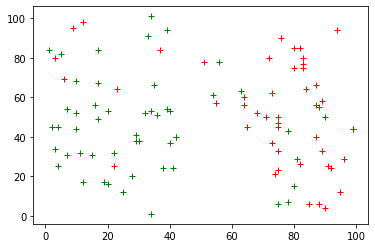

In [5]:
import matplotlib.pyplot as plt
import math
import random
from IPython import display
from scipy.signal import savgol_filter
plt.figure()
for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i], "r+")
    else:
        plt.plot(X1[i],X2[i],"g+")
plt.show()

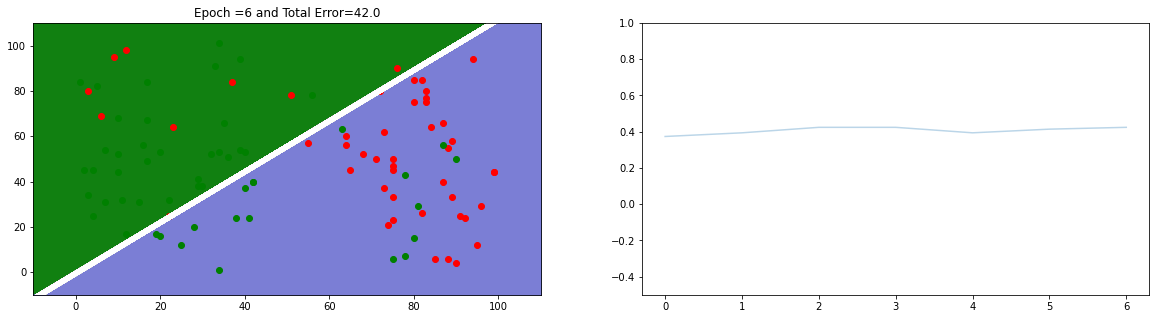

Epoch: 6 Loss: 0.42424242424242425 and y=[-11.79150901562098, 122.75426907154788] and x=0.51672599461119


In [ ]:
W=[random.random(), random.random()]
b=random.random()
lr=0.5

theta=0.5
epoch=0
count=0
loss=[]
while count < len(X1):
    total_error=0
    for i in range(len(X1)):
        ws=W[0]*X1[i]+W[1]*X2[i]+b
        pred=0
        if ws > theta:
            pred=1
        
        error = Y[i]-pred
        if error!=0:
            count=0
            total_error+=math.sqrt(error**2)
            W[0]+=lr*error*X1[i]
            W[1]+=lr*error*X2[i]
            b+=lr*error
        else:
            count+=1
    loss.append(1/len(X1)*total_error)
    plt.figure(figsize=(20,5))
    
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    for i in range(len(Y)):
        if Y[i]==0:
            plt.plot(X1[i],X2[i], "ro")
        else:
            plt.plot(X1[i],X2[i],"go")
        plt.xlim(-10,110)
        plt.ylim(-10,110)
        xint=(theta-b)/W[0]
        yint=(theta-b)/W[1]
        slope=-yint/xint
        x=plt.xlim()
        y=[]
        for i in x:
            y.append(slope*i+yint)
        plt.plot(x,y, 'w-',linewidth=5)
        plt.fill_between(x=[-10,110],y1=-10,y2=110, color='g',alpha=.02)
        plt.fill_between(x=[-10,110],y1=-10,y2=y, color='#7E7EDA',alpha=.5)
        #plt.fill_between(x=[-10,110],y1=y,y2=-5, color='g')
        
    plt.title(f"Epoch ={epoch} and Total Error={total_error}")
    plt.subplot(1,2,2)
    plt.ylim([-.5,1])
    plt.plot(loss, alpha=0.3)
    if epoch > 15:
        avg = savgol_filter(loss, 11, 3) # window size 51, polynomial order 3
        plt.plot(avg, 'r--', lw=3)
    
    plt.show()
    print(f"Epoch: {epoch} Loss: {loss[-1]} and y={y} and x={xint}")
    epoch+=1